<a href="https://colab.research.google.com/github/MuradovMaks/CNN_cats_and_dogs/blob/main/CNN_MobileNet_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip -qo "cat-and-dog" -d ./temp
IMAGE_PATH = './temp/training_set/training_set/'
BASE_DIR = './dataset/'

In [ ]:
import os
# Набор утилит для работы с файловой системой
import shutil
from keras import layers # импортируем слои
from keras import models # импортируем модели
from keras import optimizers  # импортируем функции оптимизации
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = './temp/training_set/training_set/'

# Папка в которой будем создавать выборки
BASE_DIR = './dataset/'

# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# При повторном запуске пересоздаим структуру каталогов
# Если папка существует, то удаляем ее со всеми вложенными каталогами и файлами
if os.path.exists(BASE_DIR):
    shutil.rmtree(BASE_DIR)

# Создаем папку по пути BASE_DIR
os.mkdir(BASE_DIR)

# Сцепляем путь до папки с именем вложенной папки. Аналогично BASE_DIR + '/train'
train_dir = os.path.join(BASE_DIR, 'train')

# Создаем подпапку, используя путь
os.mkdir(train_dir)

# Сцепляем путь до папки с именем вложенной папки. Аналогично BASE_DIR + '/validation'
validation_dir = os.path.join(BASE_DIR, 'validation')

# Создаем подпапку, используя путь
os.mkdir(validation_dir)

# Сцепляем путь до папки с именем вложенной папки. Аналогично BASE_DIR + '/test'
test_dir = os.path.join(BASE_DIR, 'test')

# Создаем подпапку, используя путь
os.mkdir(test_dir)

# Функция создания подвыборок (папок с файлами)
def create_dataset(
    img_path: str,         # Путь к файлам с изображениями классов
    new_path: str,         # Путь к папке с выборками
    class_name: str,       # Имя класса (оно же и имя папки)
    start_index: int,      # Стартовый индекс изображения, с которого начинаем подвыборку
    end_index: int         # Конечный индекс изображения, до которого создаем подвыборку

):

    src_path = os.path.join(img_path, class_name)  # Полный путь к папке с изображениями класса
    dst_path = os.path.join(new_path, class_name)  # Полный путь к папке с новым датасетом класса

    # Получение списка имен файлов с изображениями текущего класса
    class_files = os.listdir(src_path)

    # Создаем подпапку, используя путь
    os.mkdir(dst_path)

    # Перебираем элементы, отобранного списка с начального по конечный индекс
    for fname in class_files[start_index : end_index]:
        # Путь к файлу (источник)
        src = os.path.join(src_path, fname)
        # Новый путь расположения файла (назначение)
        dst = os.path.join(dst_path, fname)
        # Копируем файл из источника в новое место (назначение)
        shutil.copyfile(src, dst)


for class_label in range(CLASS_COUNT):    # Перебор по всем классам по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен

    # Создаем обучающую выборку для заданного класса из диапазона (0-1000)
    create_dataset(IMAGE_PATH, train_dir, class_name, 0, 1000)
    # Создаем проверочную выборку для заданного класса из диапазона (1000-1500)
    create_dataset(IMAGE_PATH, validation_dir, class_name, 1000, 1500)
    # Создаем тестовую выборку для заданного класса из диапазона (1500-2000)
    create_dataset(IMAGE_PATH, test_dir, class_name, 1500, 2000)

In [ ]:
from keras.applications import MobileNet
from keras import models
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras import optimizers
from keras.models import Model
def model_maker():
    base_model = MobileNet(include_top=False, input_shape = (150,150, 3))

    for layer in base_model.layers[:]:
        layer.trainable = False
    input = layers.Input(shape=(150, 150, 3))
    custom_model = base_model(input)
    custom_model = GlobalAveragePooling2D()(custom_model)
    custom_model = Dense(64, activation='relu')(custom_model)
    custom_model = Dropout(0.5)(custom_model)
    predictions = Dense(CLASS_COUNT, activation='softmax')(custom_model)

    return Model(inputs=input,outputs=predictions)

In [ ]:
model = model_maker()

<ipython-input-3-d737a423bdbd>:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(include_top=False, input_shape = (150,150, 3))


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=0.2,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='categorical')





Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=2e-5),loss='categorical_crossentropy',metrics=['acc'])
history = model.fit(x=train_generator,epochs=100,validation_data=validation_generator)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 576ms/step - acc: 0.5396 - loss: 1.6930 - val_acc: 0.6890 - val_loss: 0.6114
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 561ms/step - acc: 0.6379 - loss: 0.9595 - val_acc: 0.8100 - val_loss: 0.3879
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 568ms/step - acc: 0.6975 - loss: 0.7648 - val_acc: 0.8650 - val_loss: 0.2980
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 569ms/step - acc: 0.7667 - loss: 0.5541 - val_acc: 0.8900 - val_loss: 0.2511
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 86s 607ms/step - acc: 0.8059 - loss: 0.4567 - val_acc: 0.9140 - val_loss: 0.2177
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 77s 553ms/step - acc: 0.8070 - loss: 0.4831 - val_acc: 0.9220 - val_loss: 0.1973
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 542ms/step - acc: 0.8393 - loss: 0.3763 - val_acc: 0.9280 - val_loss: 0.1820
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 85s 575ms/step - acc: 0.8553 - loss: 0.3630 - val_acc: 0.9340 - val_loss: 0.1695
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 55s

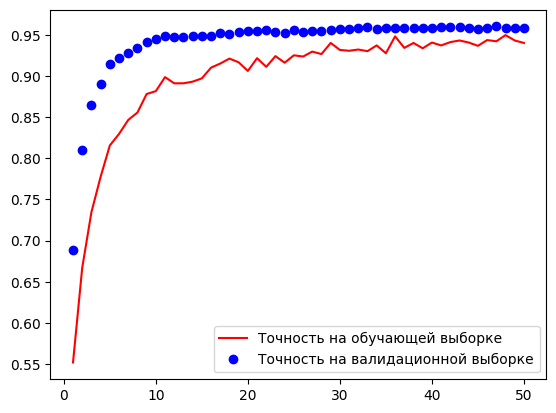

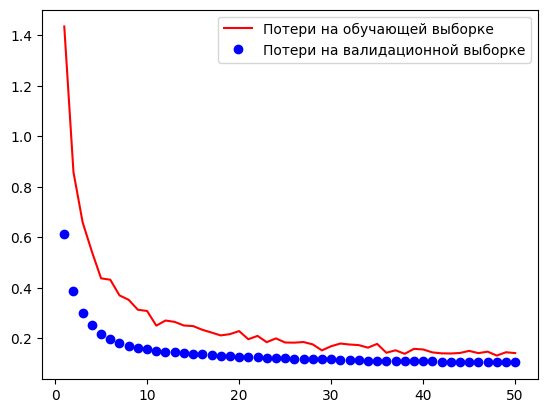

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'r',label='Точность на обучающей выборке')
plt.plot(epochs,val_acc,'bo',label='Точность на валидационной выборке')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'r',label='Потери на обучающей выборке')
plt.plot(epochs,val_loss,'bo',label='Потери на валидационной выборке')
plt.legend()
plt.show()


In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,class_mode='categorical')
test_acc,test_loss = model.evaluate(test_generator,steps=50)

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 298ms/step - acc: 0.9711 - loss: 0.0816


In [ ]:
print(f'Точность на контрольной выборке:{test_acc}')
print(f'Потери на контрольной выборке:{test_loss}')

Точность на контрольной выборке:0.10463283210992813
Потери на контрольной выборке:0.9639999866485596
